In [1]:
import pandas as pd
from pandas import DataFrame,Series
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as smf

C:\Users\student\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# format = '%Y年%m月' 
# 上で作ったフォーマットを適用するパーサを作成
# parser = lambda date: pd.datetime.strptime(date, format)
 #日付型で読み込み

path = 'C:/Users/student/Documents/卒論/'
kakei = pd.read_csv(path + 'sampledata.csv',parse_dates = [0],encoding = "Shift-JIS",engine = "python",index_col = [0])

In [3]:
no_syouhi = kakei.drop("消費支出",axis=1)
syouhi = kakei["消費支出"]
syouhi = syouhi.reset_index(drop=True)

In [4]:
x = list(range(1,31))

In [5]:
no_syouhi.columns=x

In [6]:
no_syouhi.head()

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
2007-01-01,1793,2163,1151,347,4314,1154,672,700,4951,1056,...,2567,4562,3119,4679,802,629,1660,2662,11343,1100
2007-02-01,2104,2141,1078,327,4099,1183,624,678,4600,1109,...,2590,4855,3209,4240,802,598,1629,2754,9174,1115
2007-03-01,2322,2385,1233,316,4665,1295,648,810,4873,1242,...,2729,5305,3497,4710,974,644,1904,3205,10944,604
2007-04-01,2350,2338,1243,293,4339,1252,617,769,4766,1272,...,2717,4791,3336,4590,997,624,1949,3311,10560,674
2007-05-01,2309,2326,1305,284,4439,1275,603,769,4829,1338,...,2786,4938,3241,4597,1281,691,2256,3278,10506,1417


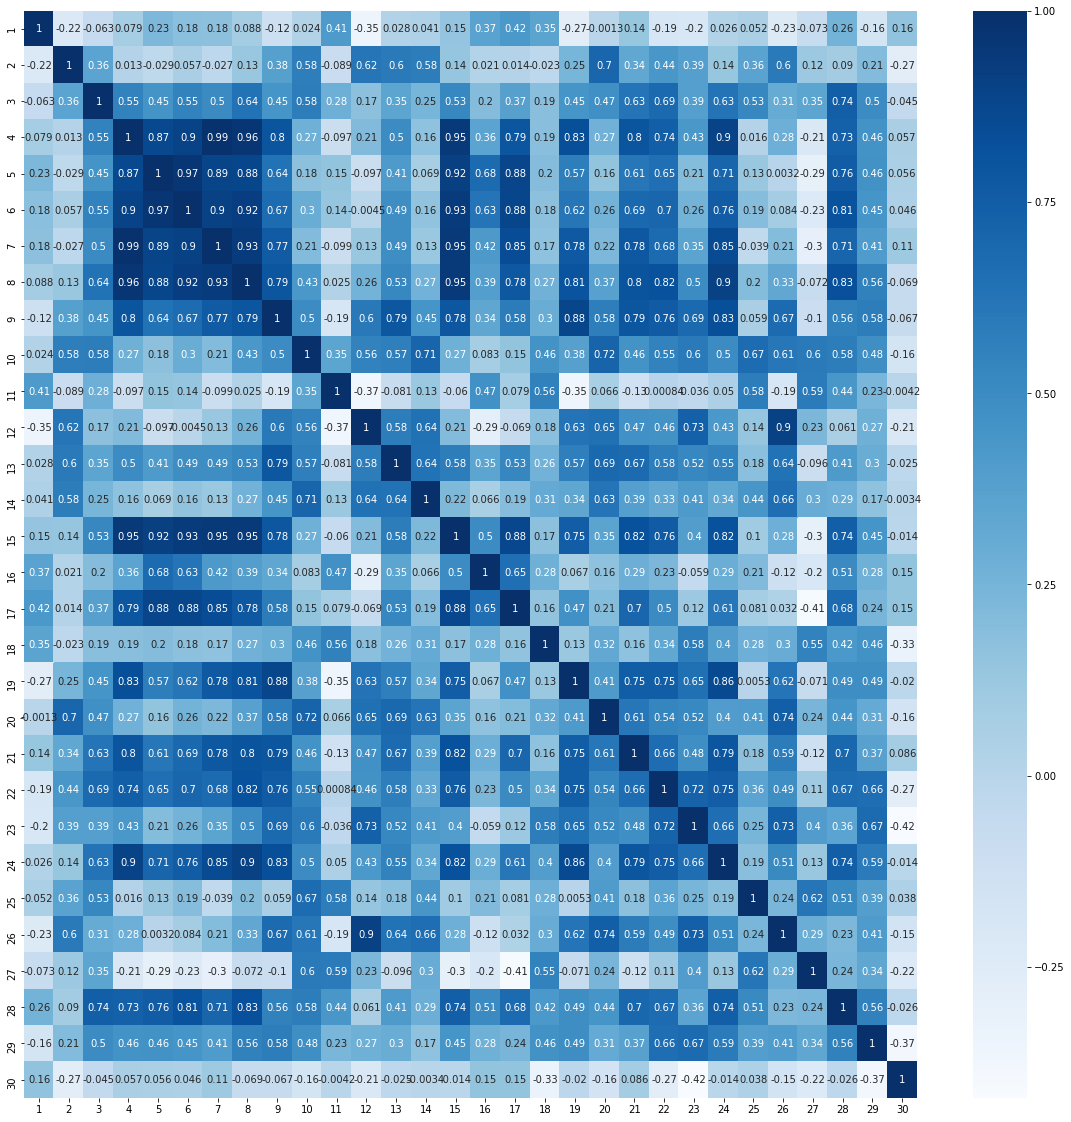

In [7]:
#主成分分析する前に、現状の説明変数の相関が高そうか(次元圧縮が有効層か)確認
#annot 数値をセルに書き込む
plt.figure(figsize=(20, 20))
sns.heatmap(pd.DataFrame(no_syouhi).corr(),annot=True,cmap='Blues')

<Container object of 10 artists>

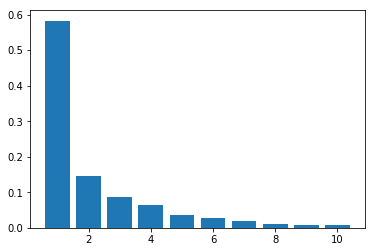

In [8]:
from sklearn.decomposition import PCA

#主成分分析　n_componentsで次元数
#寄与率をグラフ化　次元圧縮に用いる場合、累積寄与率80%の主成分のみを使い、以降の主成分は切り捨てられることが多い

pca = PCA(n_components = 10)
pca.fit(no_syouhi)
plt.bar([n for n in range(1, len(pca.explained_variance_ratio_)+1)], pca.explained_variance_ratio_)

In [9]:
pca = PCA(n_components=3)
# 分析結果を元にデータセットを主成分に変換する
no_syouhi_pca = pca.fit_transform(no_syouhi)
print('no_syouhi_pca shape: {}'.format(no_syouhi_pca.shape))

no_syouhi_pca shape: (120, 3)


In [10]:
#寄与率
print('explained variance ratio: {}'.format(pca.explained_variance_ratio_))
#累積寄与率
np.cumsum(pca.explained_variance_ratio_)

explained variance ratio: [ 0.58277106  0.14620658  0.08670822]


array([ 0.58277106,  0.72897764,  0.81568586])

In [11]:
#固有ベクトル(主成分)
new_inshi =pca.components_
new_inshi = pd.DataFrame(new_inshi)
new_inshi.columns = ['米', 'パン', 'めん類', '他の穀類', '生鮮魚介', '塩干魚介', '魚肉練製品', '他の魚介加工品', '生鮮肉','加工肉', '牛乳', '乳製品', '卵', '生鮮野菜', '乾物海藻', '大豆加工品', '他の野菜海藻加工品', '生鮮果物','果物加工品', '油脂', '調味料', '菓子類', '主食的調理食品', '他の調理食品', '茶類', 'コーヒーココア','他の飲料', '酒類', '一般外食', '学校給食']
new_inshi = new_inshi.T
new_inshi.rename(columns = {0:'PC1',1:'PC2',2:"PC3"},inplace=True)

In [12]:
new_inshi.head()

,PC1,PC2,PC3
米,-0.008435,-0.243904,-0.175162
パン,0.020565,0.033309,0.105541
めん類,0.054376,0.003067,0.010501
他の穀類,0.153382,-0.165257,-0.029437
生鮮魚介,0.314392,-0.387486,-0.400370


In [13]:
new_inshi.sort_values(by='PC1',ascending=False)

,PC1,PC2,PC3
他の調理食品,0.527219,-0.241051,0.230812
一般外食,0.515435,0.659428,-0.391172
生鮮肉,0.341691,-0.125665,0.272080
生鮮魚介,0.314392,-0.387486,-0.400370
菓子類,0.265348,0.007915,0.073105
酒類,0.208433,-0.096554,-0.097574
他の穀類,0.153382,-0.165257,-0.029437
主食的調理食品,0.145476,0.148759,0.195640
調味料,0.123754,-0.124912,0.100204
魚肉練製品,0.120211,-0.160137,-0.047339


In [14]:
no_syouhi_pca = pd.DataFrame(no_syouhi_pca)
no_syouhi_pca.columns = ['PC1','PC2',"PC3"]
no_syouhi_pca.head()

,PC1,PC2,PC3
0,-272.235677,231.840741,-1363.056119
1,-1725.603747,-1031.488423,-703.148228
2,144.989046,-103.222271,-995.738717
3,-386.844700,-219.415034,-620.780460
4,-289.481200,-289.321997,-355.282629


In [37]:
a = pd.concat([no_syouhi_pca,syouhi],axis=1)
a.head()
a.to_csv("主成分得点データ.csv",index=False,encoding="shift_jis")

In [16]:
#説明変数作成
#loc 特定の列を抽出(ラベル指定)
X = a.drop("消費支出",axis=1)
Y = a["消費支出"]
#add_constantは切片
model = smf.OLS(Y,smf.add_constant(X))
result = model.fit()
result.summary()
#p値が0.05未満なら「その変数の効果がない」という仮説を棄却

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   消費支出   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     68.05
Date:                Sat, 20 Jan 2018   Prob (F-statistic):           1.86e-25
Time:                        17:38:46   Log-Likelihood:                -1290.7
No. Observations:                 120   AIC:                             2589.
Df Residuals:                     116   BIC:                             2601.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.897e+05   1053.610    274.963      0.000    2.88e+05    2.92e+05
PC1            8.3888      0.681     12.322      0.000       7.040       9.737
PC2           -3.5561      1.359     -2.616      0.010      -6.248      -0.864
PC3          -11.9008      1.765     -6.743      0.000     -15.397      -8.405
==============================================================================
Omnibus:                       33.254   Durbin-Watson:                   1.688
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.900
Skew:                           1.252   Prob(JB):                     4.41e-13
Kurtosis:                       5.260   Cond. No.                     1.55e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
kakei.head()

,米,パン,麺類,他の穀類,生鮮魚介,塩干魚介,魚肉練製品,他の魚介加工品,生鮮肉,加工肉,...,菓子類,主食的調理食品,他の調理食品,茶類,コーヒー・ココア,他の飲料,酒類,一般外食,学校給食,消費支出
2007-01-01,1793,2163,1151,347,4314,1154,672,700,4951,1056,...,4562,3119,4679,802,629,1660,2662,11343,1100,296472
2007-02-01,2104,2141,1078,327,4099,1183,624,678,4600,1109,...,4855,3209,4240,802,598,1629,2754,9174,1115,272763
2007-03-01,2322,2385,1233,316,4665,1295,648,810,4873,1242,...,5305,3497,4710,974,644,1904,3205,10944,604,313563
2007-04-01,2350,2338,1243,293,4339,1252,617,769,4766,1272,...,4791,3336,4590,997,624,1949,3311,10560,674,316163
2007-05-01,2309,2326,1305,284,4439,1275,603,769,4829,1338,...,4938,3241,4597,1281,691,2256,3278,10506,1417,293231


In [18]:
kakei.to_csv("sampledata.csv")

交差検証法

In [21]:
from sklearn import cross_validation
from sklearn import linear_model
clf = linear_model.LinearRegression()

In [32]:
X1 = a.drop("消費支出",axis=1)
Y1 = a["消費支出"]

In [23]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf,X1,Y1,cv=10)
print(scores)

[ 0.74265728  0.54717247  0.69680803  0.59485892  0.72423732  0.61926027
  0.68065548  0.43167185  0.44443538  0.53947864]


In [24]:
#交差検証１０回の平均
scores.mean()

0.60212356442372239